# Name : Rohit Dileep

# Spark Foundation Internship

# Grip January Batch - 2021

# Task : Stock Market Prediction using Numerical and Textual Analysis

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
df_stock = pd.read_csv('C:/Users/Lenovo/Downloads/Gripsparkfoundation/^BSESN.csv')
df_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-06,41378.339844,41378.339844,40613.960938,40676.628906,40676.628906,8700.0
1,2020-01-07,40983.039063,41230.140625,40727.371094,40869.468750,40869.468750,11900.0
2,2020-01-08,40574.828125,40866.359375,40476.550781,40817.738281,40817.738281,18200.0
3,2020-01-09,41216.671875,41482.121094,41175.718750,41452.351563,41452.351563,7800.0
4,2020-01-10,41568.199219,41775.109375,41447.800781,41599.718750,41599.718750,13200.0


In [159]:
df_stock['Date'] =pd.to_datetime(df_stock['Date']).copy()

In [160]:
df =df_stock.loc[:,['Date','Close']].copy()

In [161]:
df.set_index('Date',inplace=True)

In [162]:
df.dropna(inplace=True)

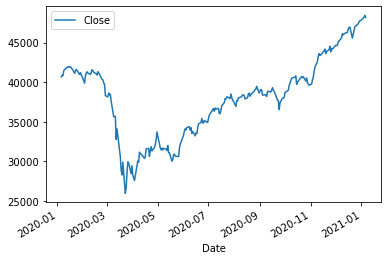

In [163]:
df.plot()

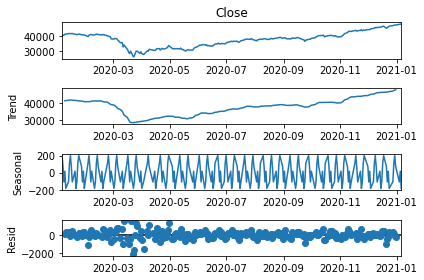

In [164]:
##Seasonal decomposition
import statsmodels.api as sm
seas_d=sm.tsa.seasonal_decompose(df['Close'],period=7);
fig=seas_d.plot()
fig.set_figheight(4)
plt.show()

In [165]:
## Dickey Fuller test to idtentify whether the there is stationarity or not.

In [166]:
from statsmodels.tsa.stattools import adfuller

In [167]:
def adfuller_test(x):
    result=adfuller(x)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [168]:
adfuller_test(df['Close'])

ADF Test Statistic : -0.741092358159337
p-value : 0.8358167138891167
#Lags Used : 7
Number of Observations Used : 242
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [169]:
# 1st Differention 
df['1st_d'] = df['Close'] -df['Close'].shift(1)

In [170]:
adfuller_test(df['1st_d'].dropna())

ADF Test Statistic : -5.489045354306428
p-value : 2.1963359441664555e-06
#Lags Used : 5
Number of Observations Used : 243
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [171]:
df['2nd_d'] = df['Close'] -df['Close'].shift(2)

In [172]:
adfuller_test(df['2nd_d'].dropna())

ADF Test Statistic : -3.6511690322460577
p-value : 0.004854854706633168
#Lags Used : 10
Number of Observations Used : 237
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [173]:
#Plotting partial auto correlation and auto correlation for ar and ma to identify p and q values
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

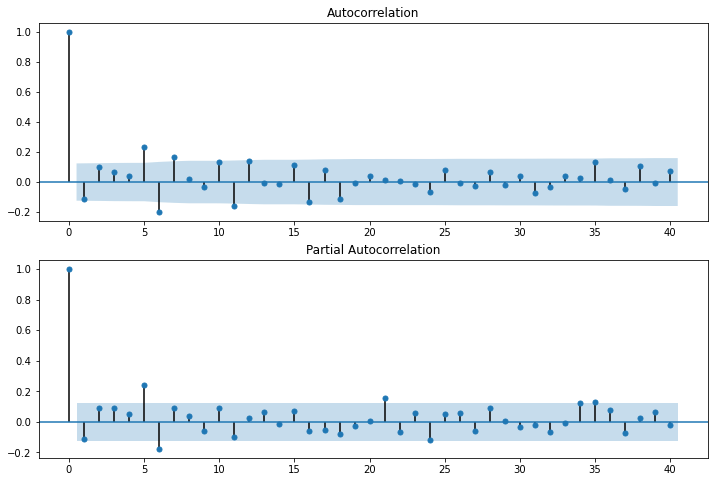

In [174]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['1st_d'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['1st_d'].dropna(),lags=40,ax=ax2)

In [175]:
from statsmodels.tsa.arima_model import ARIMA

In [176]:
model=ARIMA(df['Close'],order=(0,1,0))
model_fit=model.fit()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [177]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                  249
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1970.781
Method:                           css   S.D. of innovations            662.384
Date:                Sat, 09 Jan 2021   AIC                           3945.563
Time:                        15:29:29   BIC                           3952.598
Sample:                             1   HQIC                          3948.394
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.1102     41.977      0.717      0.473     -52.163     112.383
==============================================================================
"""

In [178]:
df

,Close,1st_d,2nd_d
Date,,,
2020-01-06,40676.628906,NaN,NaN
2020-01-07,40869.468750,192.839844,NaN
2020-01-08,40817.738281,-51.730469,141.109375
2020-01-09,41452.351563,634.613282,582.882813
2020-01-10,41599.718750,147.367187,781.980469
...,...,...,...
2020-12-30,47746.218750,133.140625,392.468750
2020-12-31,47751.328125,5.109375,138.250000
2021-01-04,48176.800781,425.472656,430.582031


In [179]:
df['forecast']=model_fit.predict(start=230,end=249,dynamic=True)


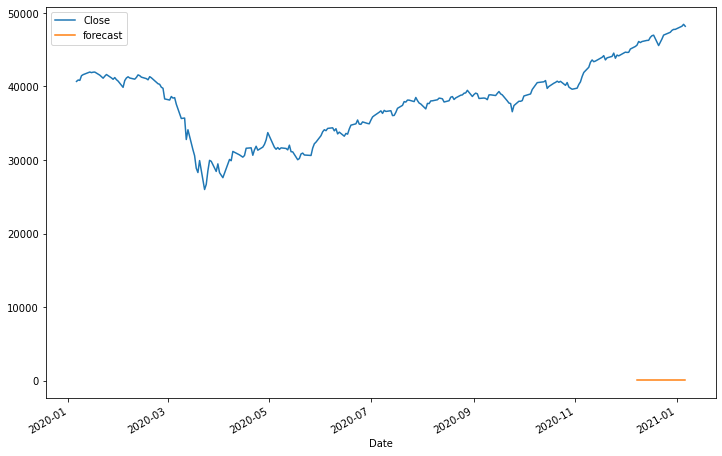

In [180]:
df[['Close','forecast']].plot(figsize=(12,8))

In [181]:
##Becase of Seasonality the ARIMA model didn't work  well...

In [182]:
## Now predicting using SARIMAX model
import statsmodels.api as sm

model_1=sm.tsa.statespace.SARIMAX(df['Close'],order=(0, 1, 0),seasonal_order=(0,1,0,7))
results=model_1.fit()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


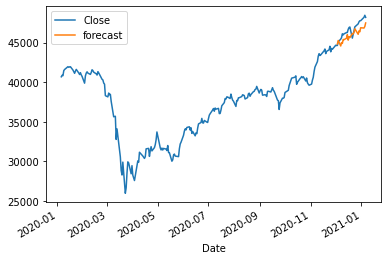

In [183]:
df['forecast']=results.predict(start=227,end=249,dynamic=True)
df[['Close','forecast']].plot()

In [184]:
df

,Close,1st_d,2nd_d,forecast
Date,,,,
2020-01-06,40676.628906,NaN,NaN,NaN
2020-01-07,40869.468750,192.839844,NaN,NaN
2020-01-08,40817.738281,-51.730469,141.109375,NaN
2020-01-09,41452.351563,634.613282,582.882813,NaN
2020-01-10,41599.718750,147.367187,781.980469,NaN
...,...,...,...,...
2020-12-30,47746.218750,133.140625,392.468750,46357.085939
2020-12-31,47751.328125,5.109375,138.250000,46862.808595
2021-01-04,48176.800781,425.472656,430.582031,46825.406252


In [185]:
q = df.iloc[227:249]

In [186]:
import sklearn.metrics as metrics

In [187]:
##Root mean squared error
np.sqrt(metrics.mean_squared_error(q.Close,q.forecast))

932.916094028952

In [188]:
## News Dataset

In [189]:
df_news = pd.read_csv('C:/Users/Lenovo/Downloads/Gripsparkfoundation/india-news-headlines.csv')

In [190]:
df_news

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
...,...,...,...
3297167,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india
3297168,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297169,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297170,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...


In [191]:
df_news.isna().any()

publish_date         False
headline_category    False
headline_text        False
dtype: bool

In [192]:
df_news['publish_date']=pd.to_datetime(df_news['publish_date'],format="%Y%m%d").copy()

In [193]:
df_news['publish_date'].tail()

3297167   2020-06-30
3297168   2020-06-30
3297169   2020-06-30
3297170   2020-06-30
3297171   2020-06-30
Name: publish_date, dtype: datetime64[ns]

In [194]:
df_news['txt'] = df_news['headline_category']  + " " + df_news['headline_text'].copy()

In [195]:
df_news['txt']

0          sports.wwe win over cena satisfying but defeat...
1          unknown Status quo will not be disturbed at Ay...
2                unknown Fissures in Hurriyat over Pak visit
3              unknown America's unwanted heading for India?
4                 unknown For bigwigs; it is destination Goa
                                 ...                        
3297167    gadgets-news why tiktok removed 1 65 crore vid...
3297168    entertainment.hindi.bollywood apurva asrani ca...
3297169    entertainment.hindi.bollywood kangana ranaut g...
3297170    entertainment.hindi.bollywood meezaan jaffrey ...
3297171    entertainment.telugu.movies.news prabhas20 tit...
Name: txt, Length: 3297172, dtype: object

In [196]:
import sqldf

In [197]:
query='select publish_date,txt from df_news group by publish_date'
df = sqldf.run(query)

In [198]:
df

,publish_date,txt
0,2001-01-01 00:00:00,sports.wwe win over cena satisfying but defeat...
1,2001-01-02 00:00:00,unknown Status quo will not be disturbed at Ay...
2,2001-01-03 00:00:00,unknown Powerless north India gropes in the dark
3,2001-01-04 00:00:00,unknown The string that pulled Stephen Hawking...
4,2001-01-05 00:00:00,unknown Light combat craft takes India into cl...
...,...,...
7075,2020-06-26 00:00:00,city.bhubaneswar Containment zone residents sl...
7076,2020-06-27 00:00:00,life-style.parenting.moments like me i wont le...
7077,2020-06-28 00:00:00,entertainment.bengali.movies.news Atanu Ghosh ...
7078,2020-06-29 00:00:00,life-style.fashion.celeb-style 6 hot and styli...


In [199]:
df['publish_date'] = pd.to_datetime(df['publish_date']).copy()

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7080 entries, 0 to 7079
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   publish_date  7080 non-null   datetime64[ns]
 1   txt           7080 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 110.8+ KB


In [201]:
# Filtering data
df = df[(df.publish_date >= '2020-01-06')].copy()

In [202]:
df.reset_index(inplace=True)

In [203]:
# Tfidf vectoriser to convert textual data to numerical form.
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [204]:
corpus =[]
for i in range(0,len(df)):
    review = re.sub(r'\W', ' ', str(df.txt[i]))
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'^[a-z]\s+', '', review)
    review = re.sub(r'\s+', ' ', review)
    corpus.append(review)

In [205]:
corpus[0:10]

['city nagpur with captive pics and posts city shining on social media',
 'city patna pro caa campaign in bettiah turns unruly',
 'city hyderabad seems like systematic assault say students',
 'life style food news health fix quick meals in your mason jar',
 'city chandigarh locate more zones to accommodate vendors punjab and haryana high court',
 'city mumbai in bhutan greens mostly win over devpt former pm',
 'life style relationships pets first aid tips for dogs',
 'life style fashion buzz how to stop the shopaholic in you',
 'city aurangabad officer to be appointed for smart city project only',
 'life style events makar sankranti quotes wishes messages status 15 beautiful quotes and messages for wishing makar sankranti']

In [206]:
len(corpus)

177

In [207]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
for i in range(len(corpus)):
    words=nltk.word_tokenize(corpus[i])
    words=[stemmer.stem(word) for word in words]
    corpus[i] =' '.join(words)

In [208]:
corpus[0:10]

['citi nagpur with captiv pic and post citi shine on social media',
 'citi patna pro caa campaign in bettiah turn unruli',
 'citi hyderabad seem like systemat assault say student',
 'life style food news health fix quick meal in your mason jar',
 'citi chandigarh locat more zone to accommod vendor punjab and haryana high court',
 'citi mumbai in bhutan green mostli win over devpt former pm',
 'life style relationship pet first aid tip for dog',
 'life style fashion buzz how to stop the shopahol in you',
 'citi aurangabad offic to be appoint for smart citi project onli',
 'life style event makar sankranti quot wish messag statu 15 beauti quot and messag for wish makar sankranti']

In [209]:
len(corpus)

177

In [210]:
from nltk.corpus import stopwords

In [211]:
from nltk.corpus import stopwords


# Removing stopwords
for i in range(len(corpus)):
    words = nltk.word_tokenize(corpus[i])
    words = [word for word in words if word not in stopwords.words('english')]
    corpus[i] = ' '.join(words)

In [212]:
corpus[:10]

['citi nagpur captiv pic post citi shine social media',
 'citi patna pro caa campaign bettiah turn unruli',
 'citi hyderabad seem like systemat assault say student',
 'life style food news health fix quick meal mason jar',
 'citi chandigarh locat zone accommod vendor punjab haryana high court',
 'citi mumbai bhutan green mostli win devpt former pm',
 'life style relationship pet first aid tip dog',
 'life style fashion buzz stop shopahol',
 'citi aurangabad offic appoint smart citi project onli',
 'life style event makar sankranti quot wish messag statu 15 beauti quot messag wish makar sankranti']

In [213]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [214]:
vectorize=TfidfVectorizer(max_df=0.8)
data = vectorize.fit_transform(corpus).toarray()

In [215]:
mydata = pd.DataFrame(data,columns=vectorize.get_feature_names()).copy()

In [216]:
mydata['date'] = df['publish_date'].copy()

In [217]:
mydata.head()

,000,10,100,101,11,1200,13,14,15,150,...,world,worth,year,youth,zardosi,zeal,zled,zodiac,zone,date
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2020-01-06
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2020-01-07
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2020-01-08
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2020-01-09
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.323532,2020-01-10


In [218]:
mydata.shape

(177, 964)

In [219]:
import datetime as dt
mydata['date']=mydata.date.map(dt.datetime.toordinal).copy()

In [220]:
mydata['Close'] =df_stock['Close'].copy()

In [221]:
mydata.shape

(177, 965)

In [222]:
#Building Random Forest Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [223]:
trainx,testx,trainy,testy = train_test_split(mydata[mydata.columns.difference(['Close'])],mydata['Close'],test_size=0.3,random_state=123)

In [224]:
RandomForestRegressor()

RandomForestRegressor()

In [225]:
param_grid={'n_estimators':[100,200,300,400,500]}

In [226]:
gs=GridSearchCV(estimator=RandomForestRegressor(),param_grid=param_grid,cv=5,n_jobs=-1)
gs.fit(trainx,trainy)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'n_estimators': [100, 200, 300, 400, 500]})

In [227]:
gs.best_params_

{'n_estimators': 200}

In [228]:
rf = RandomForestRegressor(n_estimators =200,random_state=0)
rf.fit(trainx,trainy)

RandomForestRegressor(n_estimators=200, random_state=0)

In [229]:
train_pred = pd.DataFrame({'actual': trainy,'predicted': rf.predict(trainx)})

In [230]:
train_pred.head()

,actual,predicted
77,33717.621094,32972.919561
79,31453.509766,31481.654375
62,30067.210938,29975.388155
7,41872.730469,41744.746211
30,41055.691406,41104.443926


In [231]:
##Root mean squared error ##
import sklearn.metrics as metrics
np.sqrt(metrics.mean_squared_error(train_pred.actual,train_pred.predicted))

284.33046635841237

In [232]:
## Test 
test_pred = pd.DataFrame({'actual': testy,'predicted': rf.predict(testx)})

In [233]:
test_pred.head()

,actual,predicted
133,37930.328125,37460.748320
134,37871.519531,37922.047422
130,36471.679688,36515.487871
163,38900.800781,38766.931524
173,39044.351563,38880.405020


In [234]:
##Root mean squared error ##
import sklearn.metrics as metrics
np.sqrt(metrics.mean_squared_error(test_pred.actual,test_pred.predicted))

640.3294598694891